In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data on which I want to perform simple linear regression
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])


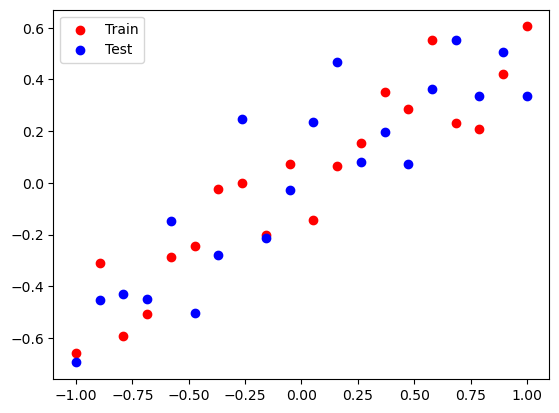

In [3]:
plt.scatter(x=X_train, y=y_train, c='red', label='Train')
plt.scatter(x=X_test, y=y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20,), (20,), (20,), (20,))

In [5]:
class SimpleLinearRegression():
    def __init__(self, lr):
        self.m = 1.0
        self.b = 0.0
        self.lr = lr
        return
    
    def forward(self, x):
        return self.m*x + self.b
    
    def backward(self, x, y, y_hat):
        # loss = (y-y_hat)** 2 MSE loss
        # partial gradients
        dl_dy_hat = 2*(y_hat-y)
        dy_hat_d_m = x 
        dy_hat_d_b = 1
        dl_dm = (dl_dy_hat * dy_hat_d_m) #Chain rule
        dl_db = (dl_dy_hat * dy_hat_d_b) #Chain rule
        self.m-= self.lr*dl_dm
        self.b-= self.lr*dl_db
        return

def mse_loss(y, y_hat):
    return (y-y_hat)** 2

def rmse_loss(y, y_hat):
    return np.sqrt(mse_loss(y,y_hat))

In [6]:
# Hyperparameters for building and training model
lr = 0.01
epochs=10
loss='RMSE'

model = SimpleLinearRegression(lr=lr)

In [7]:
train_loss = []
for epoch in range(epochs):
    cost = []
    for x, y in zip(X_train, y_train):
        # forward pass
        y_hat = model.forward(x)
        # calculate loss
        if loss=='MSE':
            cost.append( mse_loss(y,y_hat) )
        else:
            cost.append( rmse_loss(y,y_hat) )
        # backward pass - update weights from gradients using SGD
        model.backward(x, y, y_hat)
        # if epoch%2==0:
        #     print(f'Loss = {round(loss,4)} at epoch {epoch}/{epochs}')
    train_loss.append(np.average(cost))
print(f"Average Train {loss} loss over {epochs} epochs = {round(np.average(train_loss),4)}")


Average Train RMSE loss over 10 epochs = 0.1675


In [8]:
# Prediction
val_loss = []
y_hat_test=[]
for x, y in zip(X_test, y_test):
    y_hat = model.forward(x)
    y_hat_test.append(y_hat)
    if loss=='MSE':
        val_loss.append( mse_loss(y, y_hat))
    else:
        val_loss.append( rmse_loss(y, y_hat))
print(f"Average Prediction {loss} loss = {round(np.average(val_loss),4)}")

Average Prediction RMSE loss = 0.1411


In [9]:
len(y_hat_test), len(X_test)

(20, 20)

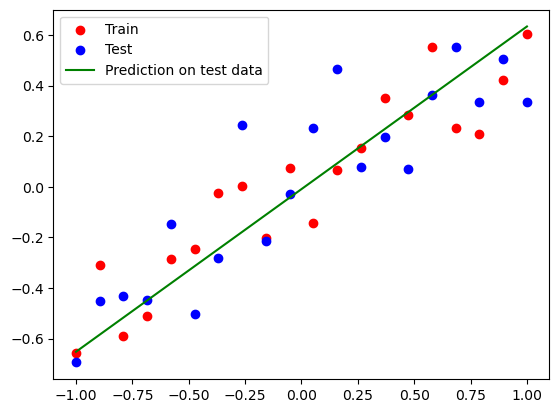

In [12]:
plt.scatter(x=X_train, y=y_train, c='red', label='Train')
plt.scatter(x=X_test, y=y_test, c='blue', label='Test')
plt.plot(X_test, y_hat_test, c='green', label='Prediction on test data')
plt.legend()
plt.show()


In [11]:
np.average(train_loss), np.average(val_loss), model.m, model.b

(0.16748964441488565,
 0.14110936430481594,
 0.6426993887622069,
 -0.009021500585200338)